In [1]:
import os
import re
from sys import getsizeof

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json

In [2]:
df = pd.read_csv("data/metadata/metadata.csv")

In [3]:
df

,video_path,video_title,video_url,trick_interval,trick_info
0,data/videos/BATB_11__Championship_Battle_Luan_...,BATB_11__Championship_Battle_Luan_Oliveira_vs_...,https://www.youtube.com/watch?v=sDLIf7JVNnM,"[154.1, 155.5]","{'landed': True, 'stance': 'regular', 'body_ro..."
1,data/videos/BATB_11__Championship_Battle_Luan_...,BATB_11__Championship_Battle_Luan_Oliveira_vs_...,https://www.youtube.com/watch?v=sDLIf7JVNnM,"[149.4, 151.8]","{'landed': True, 'stance': 'regular', 'body_ro..."
2,data/videos/BATB_11__Championship_Battle_Luan_...,BATB_11__Championship_Battle_Luan_Oliveira_vs_...,https://www.youtube.com/watch?v=sDLIf7JVNnM,"[159.4, 161.4]","{'landed': True, 'stance': 'nollie', 'body_rot..."
3,data/videos/BATB_11__Championship_Battle_Luan_...,BATB_11__Championship_Battle_Luan_Oliveira_vs_...,https://www.youtube.com/watch?v=sDLIf7JVNnM,"[163.5, 165.8]","{'landed': True, 'stance': 'nollie', 'body_rot..."
4,data/videos/BATB_11__Championship_Battle_Luan_...,BATB_11__Championship_Battle_Luan_Oliveira_vs_...,https://www.youtube.com/watch?v=sDLIf7JVNnM,"[168.7, 171.2]","{'landed': True, 'stance': 'regular', 'body_ro..."
...,...,...,...,...,...
138,data/videos/BATB_11__Sean_Malto_vs_Eric_Koston...,BATB_11__Sean_Malto_vs_Eric_Koston__Round_1,https://www.youtube.com/watch?v=9Y_tUSnhV1k,"[355.4, 357.1]","{'landed': True, 'stance': 'regular', 'body_ro..."
139,data/videos/BATB_11__Sean_Malto_vs_Eric_Koston...,BATB_11__Sean_Malto_vs_Eric_Koston__Round_1,https://www.youtube.com/watch?v=9Y_tUSnhV1k,"[359.3, 361.5]","{'landed': True, 'stance': 'regular', 'body_ro..."
140,data/videos/BATB_11__Sean_Malto_vs_Eric_Koston...,BATB_11__Sean_Malto_vs_Eric_Koston__Round_1,https://www.youtube.com/watch?v=9Y_tUSnhV1k,"[365.3, 367.0]","{'landed': True, 'stance': 'fakie', 'body_rota..."
141,data/videos/BATB_11__Sean_Malto_vs_Eric_Koston...,BATB_11__Sean_Malto_vs_Eric_Koston__Round_1,https://www.youtube.com/watch?v=9Y_tUSnhV1k,"[368.3, 370.1]","{'landed': False, 'stance': 'fakie', 'body_rot..."


In [4]:
paths = df["video_path"]

In [5]:
all_videos = []
for path in paths:
    video_reader = cv2.VideoCapture(path)
    frames = []
    while True:
        success, frame = video_reader.read()
        if not success:
            break
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(frame_rgb)
    video_reader.release()
    all_videos.append(frames)

(-0.5, 1279.5, 719.5, -0.5)

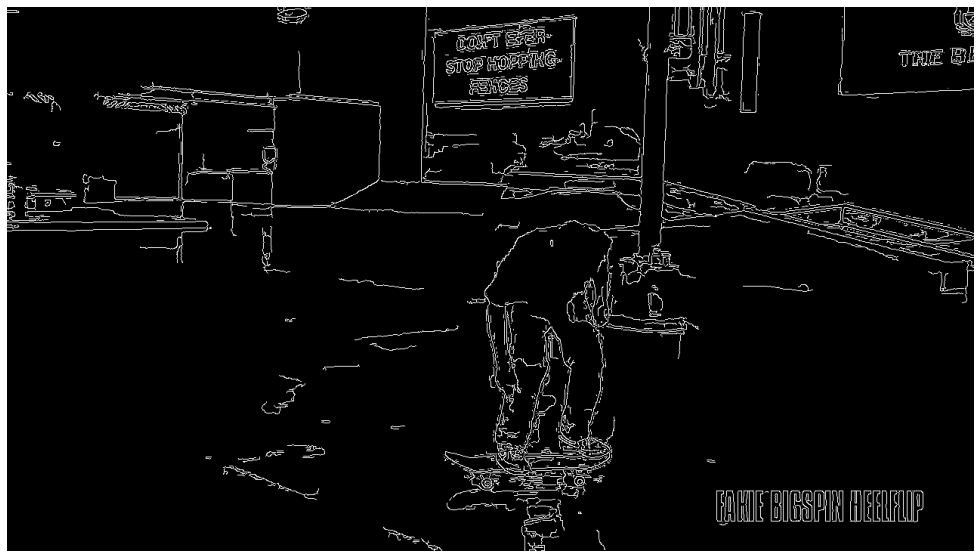

In [6]:
plt.figure(figsize=(40,10))
plt.imshow(cv2.Canny(all_videos[-1][2], 70, 10), cmap='gray')
plt.axis("off")

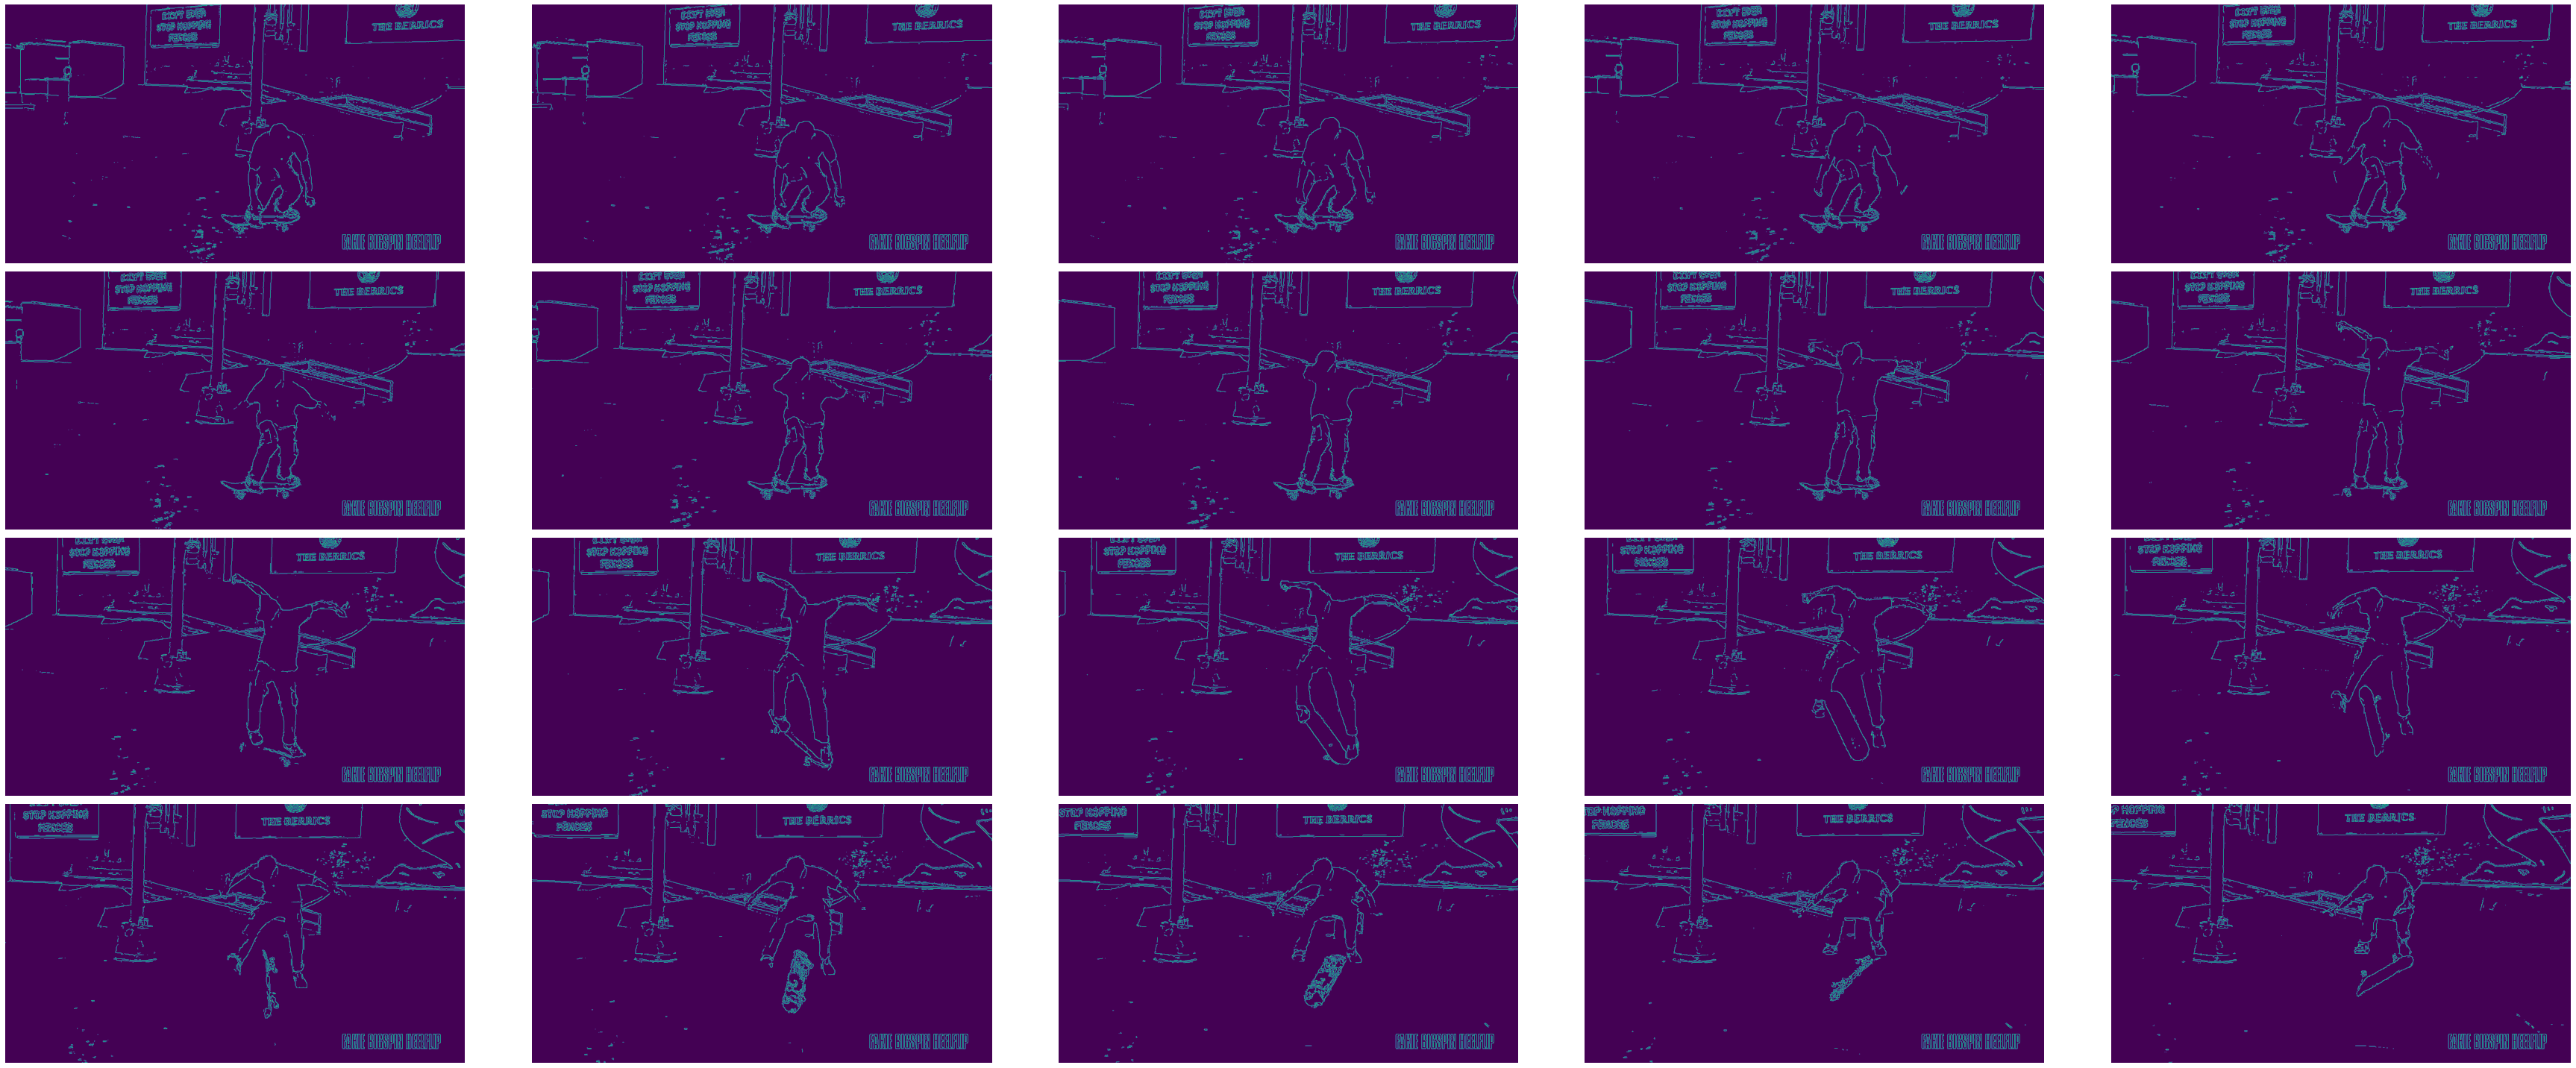

In [7]:
f = 20
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(50, 20))
for idx, ax in enumerate(axes.flatten()):
    ax.imshow(cv2.Canny(frames[idx+10], 70, 70))
    ax.axis('off')
plt.tight_layout()

# Tricks Dictionary

In [54]:
TRICKS_DICT = {
    "kickflip":{
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "none",
        "board_rotation_number": 0,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "double kickflip":{
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "none",
        "board_rotation_number": 0,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "triple kickflip":{
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "none",
        "board_rotation_number": 0,
        "flip_type": "kickflip",
        "flip_number": 3
    },
    "fs 180 kickflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "bs 180 kickflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "fs 360 kickflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 2,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "bs 360 kickflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 2,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "fs 180 double kickflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "bs 180 double kickflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "fs 360 double kickflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 2,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "bs 360 double kickflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 2,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "heelflip":{
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "none",
        "board_rotation_number": 0,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "double heelflip":{
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "none",
        "board_rotation_number": 0,
        "flip_type": "heelflip",
        "flip_number": 2
    },
    "triple heelflip":{
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "none",
        "board_rotation_number": 0,
        "flip_type": "heelflip",
        "flip_number": 3
    },
    "fs 180 heelflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "bs 180 heelflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "fs 360 heelflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 2,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "bs 360 heelflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 2,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "fs 180 double heelflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "heelflip",
        "flip_number": 2
    },
    "bs 180 double heelflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "heelflip",
        "flip_number": 2
    },
    "fs 360 double heelflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 2,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 2
    },
    "bs 360 double heelflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 2,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 2
    },
    "treflip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "tre double flip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "hardflip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "360 hardflip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "varial flip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "varial double flip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "hard double flip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "bigflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "bigspin double flip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "biggerflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 3,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "gazzele flip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 2,
        "board_rotation_type": "backside",
        "board_rotation_number": 3,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "bigspin hardflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "laserflip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "inward heel": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "varial heel": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "varial double heel": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "heelflip",
        "flip_number": 2
    },
    "360 inward heel": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "bigspin inward heel": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "bigheel": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "fs shovit": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "none",
        "flip_number": 0
    },
    "fs 360 shovit": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "none",
        "flip_number": 0
    },
    "fs 540 shovit": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 3,
        "flip_type": "none",
        "flip_number": 0
    },
    "shovit": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "none",
        "flip_number": 0
    },
    "360 shovit": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "none",
        "flip_number": 0
    },
    "540 shovit": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 3,
        "flip_type": "none",
        "flip_number": 0
    },
    "fs bigspin": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "none",
        "flip_number": 0
    },
    "fs biggerspin": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 3,
        "flip_type": "none",
        "flip_number": 0
    },
    "bs bigspin": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "none",
        "flip_number": 0
    },
    "bs biggerspin": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 3,
        "flip_type": "none",
        "flip_number": 0
    },
    "bs gazzele": {
        "body_rotation_type": "backside",
        "body_rotation_number": 2,
        "board_rotation_type": "backside",
        "board_rotation_number": 3,
        "flip_type": "none",
        "flip_number": 0
    },
    "bs 180": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "none",
        "flip_number": 0
    },
    "bs 360": {
        "body_rotation_type": "backside",
        "body_rotation_number": 2,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "none",
        "flip_number": 0
    },
    "bs 540": {
        "body_rotation_type": "backside",
        "body_rotation_number": 3,
        "board_rotation_type": "backside",
        "board_rotation_number": 3,
        "flip_type": "none",
        "flip_number": 0
    },
    "fs 180": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "none",
        "flip_number": 0
    },
    "fs 360": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 2,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "none",
        "flip_number": 0
    },
    "fs 540": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 3,
        "board_rotation_type": "frontside",
        "board_rotation_number": 3,
        "flip_type": "none",
        "flip_number": 0
    }
}

In [58]:
with open("data/TRICK_NAMES.json", 'w') as f:
    json.dump(TRICKS_DICT, f)

In [53]:
for key, val in TRICKS_DICT.items():
    if val["body_rotation_type"]=="none" and val["body_rotation_number"]!=0:
        print(f"Wrong Body Rotation Type or Wrong Body Rotation Number at {key}")

    if val["body_rotation_type"]!="none" and val["body_rotation_number"]==0:
        print(f"Wrong Body Rotation Type or Wrong Body Rotation Number at {key}")

    if val["board_rotation_type"]=="none" and val["board_rotation_number"]!=0:
        print(f"Wrong Shov Rotation Type or Wrong Shov Rotation Number at {key}")

    if val["board_rotation_type"]!="none" and val["board_rotation_number"]==0:
        print(f"Wrong Shov Rotation Type or Wrong Shov Rotation Number at {key}")

    if re.match("kickflip|flip", key) and (val["flip_type"]!='kickflip' or val["flip_number"]==0):
        print(f"Wrong flip type. Name is {key} flip type is {val['flip_type']} and flip number is {val['flip_number']}")

    if re.match(".*heel", key) and (val["flip_type"]!='heelflip' or val["flip_number"]==0):
        print(f"Wrong flip type. Name is {key} flip type is {val['flip_type']} and flip number is {val['flip_number']}")

    if 'big' in key and val["body_rotation_type"]!=val["board_rotation_type"]:
        print(f"Either one of body or shov rotation type is wrong at {key}")
    
    if 'big' in key and (val["body_rotation_number"]<1 or val["board_rotation_number"]<=1):
        print(f"Either one of body or shov rotation type is wrong at {key}")

    if 'gazzele' in key and val["body_rotation_type"]!=val["board_rotation_type"]:
        print(f"Either one of body or shov rotation type is wrong at {key}")

    if 'gazzele' in key and (val["body_rotation_number"]<2 or val["board_rotation_number"]<=2):
        print(f"Either one of body or shov rotation type is wrong at {key}")

    if ('double' in key or 'triple' in key) and (val["flip_number"] not in [2,3] or val["flip_type"]=='none'):
        print(f"Double error in {key}")

    if val['flip_type'] not in ["heelflip", "kickflip", "none"]:
        print(f"Flip type error at {key}")

    if val['board_rotation_type'] not in ["frontside", "backside", "none"] or val["body_rotation_type"] not in ['none', 'frontside', 'backside']:
        print(f"Body or rotation type error at {key}")
    
    if val["body_rotation_type"]!="none" and val["board_rotation_type"]!=val["body_rotation_type"] and True:
        pass

In [14]:
names = []
other = []
for i in range(15):
    names.append(f"img_{i:05d}.jpeg")
    other.append(f"img_{i}.jpeg")

# Pytorch Tests

In [1]:
import torch.nn as nn
import torch
from torchvision import models

In [2]:
model = models.resnet18(models.resnet.ResNet18_Weights)

c:\Users\Eduardo Pacheco\Desktop\Arquivos\Personal\SkateAI\skate\lib\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(
c:\Users\Eduardo Pacheco\Desktop\Arquivos\Personal\SkateAI\skate\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Eduardo Pacheco/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:16<00:00, 2.86MB/s]


In [61]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [12]:
vgg = models.vgg19(weights=models.vgg.VGG19_BN_Weights)

c:\Users\Eduardo Pacheco\Desktop\Arquivos\Personal\SkateAI\skate\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\Eduardo Pacheco/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [04:30<00:00, 2.13MB/s] 


In [55]:
T1 = torch.rand(1,2)
T2 = torch.rand(1,3)

In [56]:
T1

tensor([[0.6336, 0.2627]])

In [57]:
T2.unsqueeze

tensor([[0.2902, 0.6897, 0.4900]])

In [69]:
lstm = nn.LSTM(2, 12, 2)

In [70]:
x = torch.rand(10, 1, 2)

In [71]:
x

tensor([[[0.4231, 0.7181]],

        [[0.7402, 0.9705]],

        [[0.0160, 0.8351]],

        [[0.0794, 0.4413]],

        [[0.7035, 0.7420]],

        [[0.7837, 0.9334]],

        [[0.6926, 0.3781]],

        [[0.2436, 0.0696]],

        [[0.8019, 0.7812]],

        [[0.2290, 0.8376]]])

In [72]:
output, (h, c) = lstm(x)

In [83]:
output

tensor([[[ 0.0690, -0.0067,  0.0473, -0.0055,  0.0661,  0.0202,  0.0954,
           0.0172, -0.1011,  0.0712,  0.0240, -0.0438]],

        [[ 0.0856,  0.0037,  0.0716,  0.0011,  0.0906,  0.0241,  0.1151,
           0.0240, -0.1464,  0.0808,  0.0307, -0.0861]],

        [[ 0.0935,  0.0109,  0.0786,  0.0066,  0.0991,  0.0226,  0.1131,
           0.0266, -0.1579,  0.0803,  0.0333, -0.1163]],

        [[ 0.0965,  0.0182,  0.0782,  0.0108,  0.1004,  0.0219,  0.1049,
           0.0279, -0.1584,  0.0815,  0.0346, -0.1332]],

        [[ 0.0928,  0.0255,  0.0788,  0.0163,  0.0985,  0.0220,  0.1000,
           0.0291, -0.1652,  0.0793,  0.0343, -0.1380]],

        [[ 0.0893,  0.0297,  0.0797,  0.0205,  0.0970,  0.0219,  0.0982,
           0.0295, -0.1716,  0.0762,  0.0345, -0.1389]],

        [[ 0.0878,  0.0342,  0.0781,  0.0221,  0.0965,  0.0230,  0.0935,
           0.0301, -0.1725,  0.0778,  0.0367, -0.1380]],

        [[ 0.0909,  0.0360,  0.0730,  0.0218,  0.0967,  0.0243,  0.0872,
          

In [87]:
output.shape

torch.Size([10, 1, 12])

In [88]:
output[:,-1].shape

torch.Size([10, 12])

# OpenCV MP4 to images test

In [17]:
import cv2

In [22]:
cap = cv2.VideoCapture("data/videos/BATB_11__Championship_Battle_Luan_Oliveira_vs_Chris_Joslin/nollie_kickflip_landed_1.mp4")
i = 1
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.imwrite(f"imgs_video/imgs_{i:05d}.jpeg", frame)
    i+=1

In [23]:
import os